In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('fake_bills.csv')


In [238]:
#Data Pre-Processing & Cleaning

ref=df["is_genuine;diagonal;height_left;height_right;margin_low;margin_up;length"]
total_entry=[]

for i in ref:
    entry=i.split(";")
    
    for j in range(len(entry)):

        if entry[j]=="True":
            entry[j]=True
        elif entry[j]=="False":
            entry[j]=False
        elif entry[j]=="":
            break
        else:
            target=""
            va=entry[j]
            for k in range(len(va)):
                if va[k] in "1234567890.":
                    target=target+va[k].strip()
            
    
            entry[j]=float(target)
    flag=True
    for t in entry:
        if type(t)==str:
            flag=False
    
    if flag==True:
        total_entry.append(entry)

#print(total_entry)
column_no=len(total_entry[0])
cols=[]
for i in range(column_no):
    temp=[]
    for j in range(len(total_entry)):
        temp.append(total_entry[j][i])
    cols.append(temp)


#"is_genuine;diagonal;height_left;height_right;margin_low;margin_up;length"        

df1=pd.DataFrame()

for i in range(len(cols)):
    if i==0:
        df1["fake_or_not"]=cols[i]
    elif i==1:
        df1["diagonal"]=cols[i]
    elif i==2:
        df1["height_left"]=cols[i]
    elif i==3:
        df1["height_right"]=cols[i]
    elif i==4:
        df1["margin_low"]=cols[i]
    elif i==5:
        df1["margin_up"]=cols[i]
    else:
        df1["length"]=cols[i]

df1.dtypes
df1.isnull().sum()


fake_or_not     0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [239]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

df1[["diagonal", "height_left", "height_right", "margin_low", 
    "margin_up", "length"]]= scaler.fit_transform(df1[["diagonal", 
                                                       "height_left", "height_right", "margin_low", 
                                                       "margin_up", "length"]])

df1["fake_or_not"]=df1["fake_or_not"].map({True: 0, False: 1})

#sns.pairplot(df1[["fake_or_not", "diagonal", "height_left", "height_right", "margin_low", 
#                       "margin_up", "length"]])


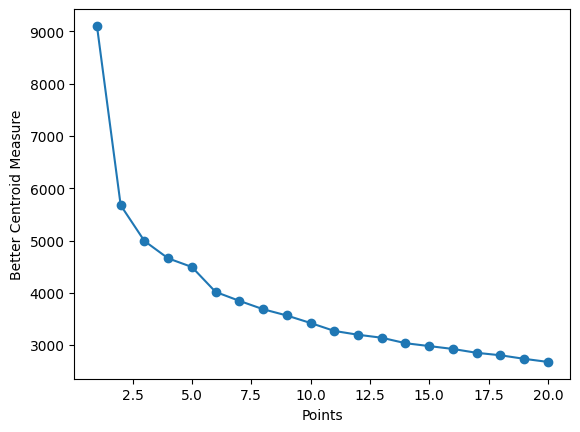

In [240]:
#K-means Clustering
from sklearn.cluster import KMeans

def kmeans(cols, limit):
    instances=[]
    points=[]

    for i in range(1, limit+1):
        model=KMeans(n_clusters=i)
        model.fit(cols)
        points.append(i)
        instances.append(model.inertia_)
    
    plt.plot(points, instances, 'o-')
    plt.xlabel("Points")
    plt.ylabel("Better Centroid Measure")
    plt.show()

kmeans(df1[["fake_or_not","diagonal", "height_left", "height_right", "margin_low", 
                       "margin_up", "length"]], 20)



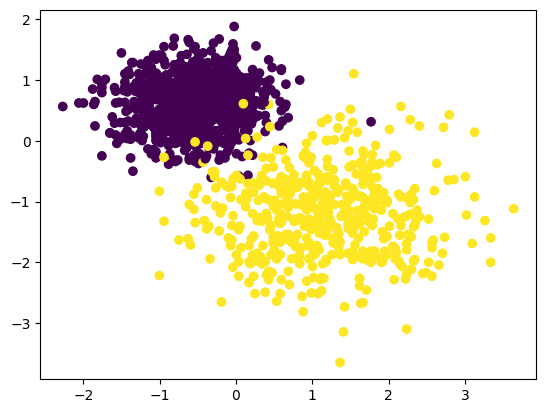

In [241]:
#K-means with n_cluster=2

model=KMeans(n_clusters=2)
model.fit(df1[["fake_or_not", "diagonal", "height_left", "height_right", "margin_low", 
                       "margin_up", "length"]])

df1["labels"]=model.labels_
plt.scatter(x=df1["margin_low"], y=df1["length"], c=df1["labels"])
plt.show()



In [242]:
from sklearn.metrics import silhouette_score, accuracy_score
acc=silhouette_score(df1[["diagonal", "height_left", "height_right", "margin_low", 
                       "margin_up", "length"]], df1["labels"])
acc1=accuracy_score(df1["fake_or_not"],df1["labels"])

print("Silhouette Score: ", acc)
print("Accuracy Score: ", acc1)


Silhouette Score:  0.3418227577732277
Accuracy Score:  0.9924812030075187
